# Multiple Linear Regression
With this example, two methods of multiple linear regression are used: gradient descent and the normal equation. Using the minimum temperature and solar exposure on a given day, the maximum temperature will be predicted

### Import modules

In [36]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

### Load in dataset
Min/max temperature are in degrees Celcius and the daily global solar exposure is measured in MJ/m*m

In [26]:
data = pd.read_csv('./data/bom_data.csv', index_col=0)
# Insert ones for the design matrix
data.insert(0, 'ones', 1)
data.head(5)

,ones,year,month,day,min_temp,max_temp,solar_exp
0,1,2013,6,2,10.4,15.7,8.0
1,1,2013,6,3,10.7,14.8,5.2
2,1,2013,6,4,11.1,15.0,3.8
3,1,2013,6,5,11.9,14.6,4.9
4,1,2013,6,6,12.6,17.3,6.2


## Normal Equation Method
A derivation for the equation used can be found [here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)  
The equation to quickly get the vector of our parameters, $\theta$ we can substitute $X$, our matrix of training data (design matrix), and $y$ our vector of targets into the formula:
$$\theta = (X^{T}X)^{-1}X^{T}y$$

### Change dataset to matrix and vector

In [27]:
x_matrix = data[['ones', 'min_temp', 'solar_exp']].values
y_vector = data[['max_temp']].values

### Apply normal equation

In [28]:
parameters = np.dot(np.linalg.inv(np.dot(x_matrix.T, x_matrix)), np.dot(x_matrix.T, y_vector))

### Create function to predict arbritrary max temperature values

In [30]:
def predict_max(parameters, min_temp, solar_exp):
    intercept, min_temp_coeff, solar_exp_coeff = parameters
    return intercept + min_temp * min_temp_coeff + solar_exp * solar_exp_coeff

### Plot prediction of max temperature using other two variables

<IPython.core.display.Javascript object>


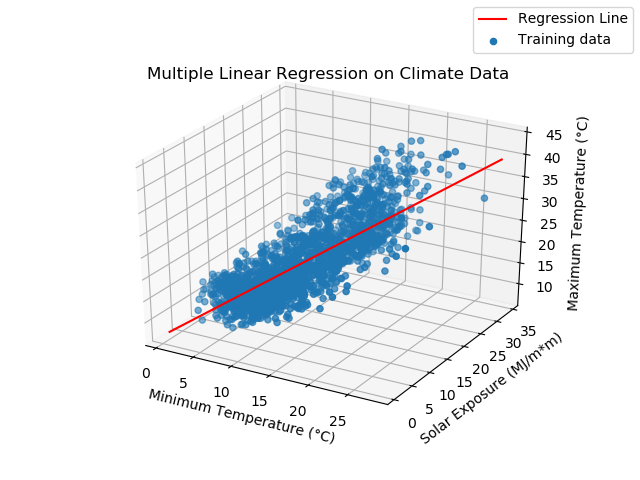

In [43]:
# Make plot interactable
%matplotlib notebook

# Get points to plot regression line
x1 = np.linspace(data['min_temp'].min(), data['min_temp'].max())
y1 = np.linspace(data['solar_exp'].min(), data['solar_exp'].max())
z1 = predict_max(parameters, x1, y1)

# Set up 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(data['min_temp'], data['solar_exp'], data['max_temp'], label='Training data')

# Plot regression line
ax.plot(x1, y1, z1, color='red', label='Regression Line')

# Label title and axis
ax.set_title('Multiple Linear Regression on Climate Data')
ax.set_xlabel('Minimum Temperature (°C)')
ax.set_ylabel('Solar Exposure (MJ/m*m)')
ax.set_zlabel('Maximum Temperature (°C)')
fig.legend()